<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_LogisticRegression_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [35]:
def plot_boundary(classifier, X, y, ax):
    x_min, x_max = -10, 8
    y_min, y_max = -10, 15
    xx           = np.linspace(x_min, x_max, 1000)
    yy           = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    C_grid = classifier.predict(X_grid)
    C_grid = C_grid.reshape(X1.shape)
    ax.contourf(X1, X2,C_grid, alpha=0.2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.scatter(X[:,0], X[:,1], c=y,s=50, cmap=plt.get_cmap('viridis'))

# Load Data & Pre-Process

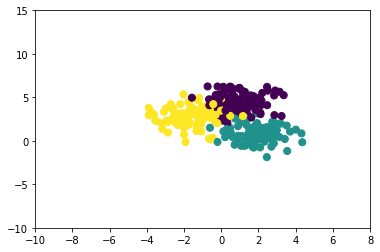

In [20]:
X, y = make_blobs(n_samples=300, centers=3, random_state=0 )

plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.ylim([-10,15])
plt.xlim([-10, 8])
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train Model

In [29]:
model = LogisticRegression().fit(X_train, y_train)

# Evaluation

In [30]:
print(f'Train Score : {model.score(X_train, y_train)}')
print(f'Test Score : {model.score(X_test, y_test)}')

Train Score : 0.9422222222222222
Test Score : 0.92


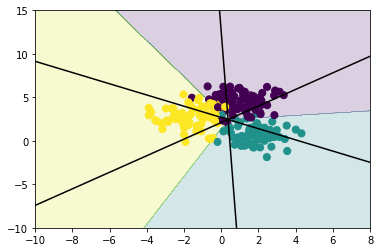

In [36]:
x = np.linspace(-10,8)
fig, ax = plt.subplots(1,1)
plot_boundary(model, X_train, y_train, ax)
for coef, intercept,c in zip(model.coef_, model.intercept_, ['k']*3):
    ax.plot(x, -(x*coef[0] + intercept)/coef[1], c)
plt.show()

# Seem to have splitted the class pretty well. Corner cases, i.e. overlapping data between classes can't be addressed by linear model

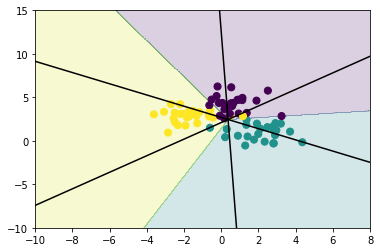

In [37]:
x = np.linspace(-10,8)
fig, ax = plt.subplots(1,1)
plot_boundary(model, X_test, y_test, ax)
for coef, intercept,c in zip(model.coef_, model.intercept_, ['k']*3):
    ax.plot(x, -(x*coef[0] + intercept)/coef[1], c)
plt.show()

# Seem to have splitted the class pretty well. Corner cases, i.e. overlapping data between classes can't be addressed by linear model